In [234]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the Data

In [235]:
# Read all the csv files
df1 = pd.read_csv('Data/202201-divvy-tripdata.csv')
df2 = pd.read_csv('Data/202202-divvy-tripdata.csv')
df3 = pd.read_csv('Data/202203-divvy-tripdata.csv')
df4 = pd.read_csv('Data/202204-divvy-tripdata.csv')
df5 = pd.read_csv('Data/202205-divvy-tripdata.csv')
df6 = pd.read_csv('Data/202206-divvy-tripdata.csv')
df7 = pd.read_csv('Data/202207-divvy-tripdata.csv')
df8 = pd.read_csv('Data/202208-divvy-tripdata.csv')
df9 = pd.read_csv('Data/202209-divvy-tripdata.csv')
df10 = pd.read_csv('Data/202210-divvy-tripdata.csv')
df11 = pd.read_csv('Data/202211-divvy-tripdata.csv')
df12 = pd.read_csv('Data/202212-divvy-tripdata.csv')

In [236]:
# Concat all the files into 1 big df
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)

In [237]:
df.shape

(5667717, 13)

In [238]:
# Check out basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [239]:
# Preview the data 
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


# Process the data

In [240]:
# Check the types of the columns
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [241]:
# Started_at and ended_at are supposed to be in datetime format
# Convert them to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [242]:
# Check the null value percentages of all the columns
df.isnull().sum()/len(df)

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    0.146984
start_station_id      0.146984
end_station_name      0.157514
end_station_id        0.157514
start_lat             0.000000
start_lng             0.000000
end_lat               0.001034
end_lng               0.001034
member_casual         0.000000
dtype: float64

In [243]:
# Fill those null values in thoe object type columns with 'NA' flag
df[['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']] = df[['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']].fillna('NA')

In [244]:
# Drop the rows that have missing values in end_lat and/ or end_lng 
df.dropna(subset=['end_lat', 'end_lng'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [245]:
# Check for number of duplicated values
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'started_at'}>,
        <AxesSubplot:title={'center':'ended_at'}>],
       [<AxesSubplot:title={'center':'start_lat'}>,
        <AxesSubplot:title={'center':'start_lng'}>],
       [<AxesSubplot:title={'center':'end_lat'}>,
        <AxesSubplot:title={'center':'end_lng'}>]], dtype=object)

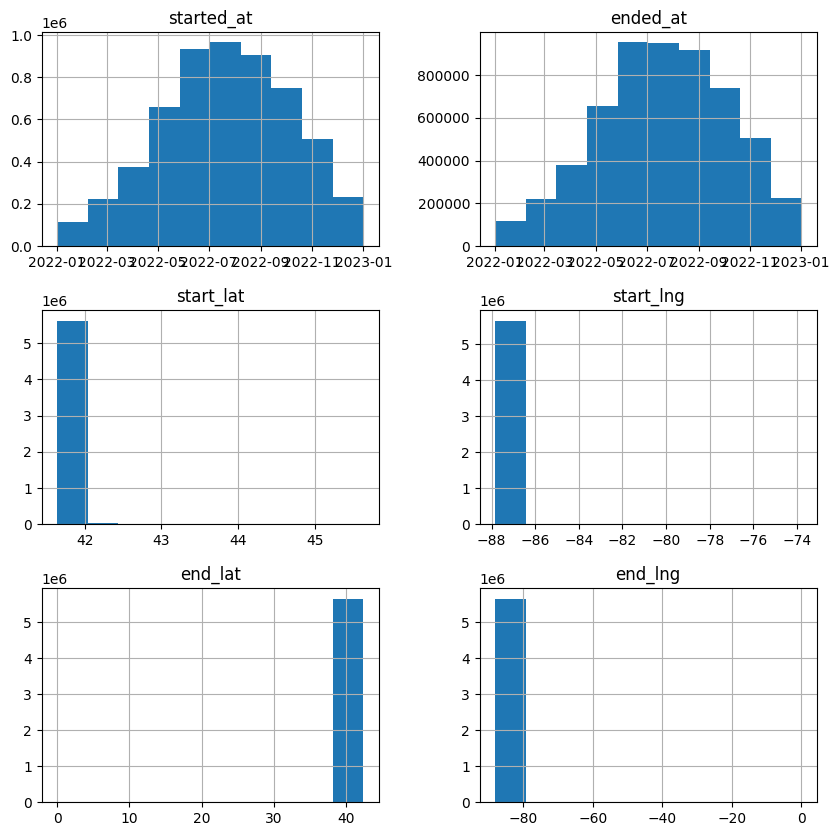

In [246]:
# Check for outliers
df.hist(figsize = (10,10))

In [247]:
df[df['start_lat'] > 43]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
11761,3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.635034,-73.796477,41.8646,-87.681,casual


In [248]:
df[df['start_lng'] > -86]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
11761,3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.635034,-73.796477,41.8646,-87.681,casual


In [249]:
df[df['end_lat'] < 35]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5143713,3B47B333C0D186F0,classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,Franklin St & Adams St (Temp),TA1309000008,Green St & Madison Ave*,chargingstx07,41.879434,-87.635504,0.0,0.0,member
5163333,42AF82C53D831251,electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,Laflin St & Cullerton St,13307,Green St & Madison Ave*,chargingstx07,41.854916,-87.663692,0.0,0.0,casual
5168166,BB8AA29838266294,classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,Canal St & Adams St,13011,Green St & Madison Ave*,chargingstx07,41.879255,-87.639904,0.0,0.0,member
5385478,6AFE1471227BD76F,classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,Morgan St & Polk St,TA1307000130,Green St & Madison Ave*,chargingstx07,41.871737,-87.651030,0.0,0.0,casual
5386553,E9495F1DC3475D41,classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,Aberdeen St & Randolph St,18062,Green St & Madison Ave*,chargingstx07,41.884114,-87.654264,0.0,0.0,member
5386812,75DE33501313D0CE,classic_bike,2022-11-09 15:52:08,2022-11-09 15:52:23,Green St & Madison St,TA1307000120,Green St & Madison Ave*,chargingstx07,41.881892,-87.648789,0.0,0.0,member
5386994,0A6988FE859F4D54,classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,LaSalle St & Jackson Blvd,TA1309000004,Green St & Madison Ave*,chargingstx07,41.878166,-87.631929,0.0,0.0,member
5387065,7F49424E860E7094,classic_bike,2022-11-09 13:27:04,2022-11-09 13:28:28,Green St & Washington Blvd,13053,Green St & Madison Ave*,chargingstx07,41.883181,-87.648725,0.0,0.0,member


In [250]:
df[df['end_lng'] > -70]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5143713,3B47B333C0D186F0,classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,Franklin St & Adams St (Temp),TA1309000008,Green St & Madison Ave*,chargingstx07,41.879434,-87.635504,0.0,0.0,member
5163333,42AF82C53D831251,electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,Laflin St & Cullerton St,13307,Green St & Madison Ave*,chargingstx07,41.854916,-87.663692,0.0,0.0,casual
5168166,BB8AA29838266294,classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,Canal St & Adams St,13011,Green St & Madison Ave*,chargingstx07,41.879255,-87.639904,0.0,0.0,member
5385478,6AFE1471227BD76F,classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,Morgan St & Polk St,TA1307000130,Green St & Madison Ave*,chargingstx07,41.871737,-87.651030,0.0,0.0,casual
5386553,E9495F1DC3475D41,classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,Aberdeen St & Randolph St,18062,Green St & Madison Ave*,chargingstx07,41.884114,-87.654264,0.0,0.0,member
5386812,75DE33501313D0CE,classic_bike,2022-11-09 15:52:08,2022-11-09 15:52:23,Green St & Madison St,TA1307000120,Green St & Madison Ave*,chargingstx07,41.881892,-87.648789,0.0,0.0,member
5386994,0A6988FE859F4D54,classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,LaSalle St & Jackson Blvd,TA1309000004,Green St & Madison Ave*,chargingstx07,41.878166,-87.631929,0.0,0.0,member
5387065,7F49424E860E7094,classic_bike,2022-11-09 13:27:04,2022-11-09 13:28:28,Green St & Washington Blvd,13053,Green St & Madison Ave*,chargingstx07,41.883181,-87.648725,0.0,0.0,member


In [251]:
df.drop(df[df['start_lat'] > 43].index, inplace=True)
df.drop(df[df['start_lng'] > -86].index, inplace=True)
df.drop(df[df['end_lat'] < 35].index, inplace=True)
df.drop(df[df['end_lng'] > -70].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [252]:
# Calculate the ride length and insert the ride_length in seconds
ride_length = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds().astype(int)
ended_at_index = df.columns.get_loc('ended_at')
df.insert(ended_at_index + 1, 'ride_length', ride_length)

<AxesSubplot:>

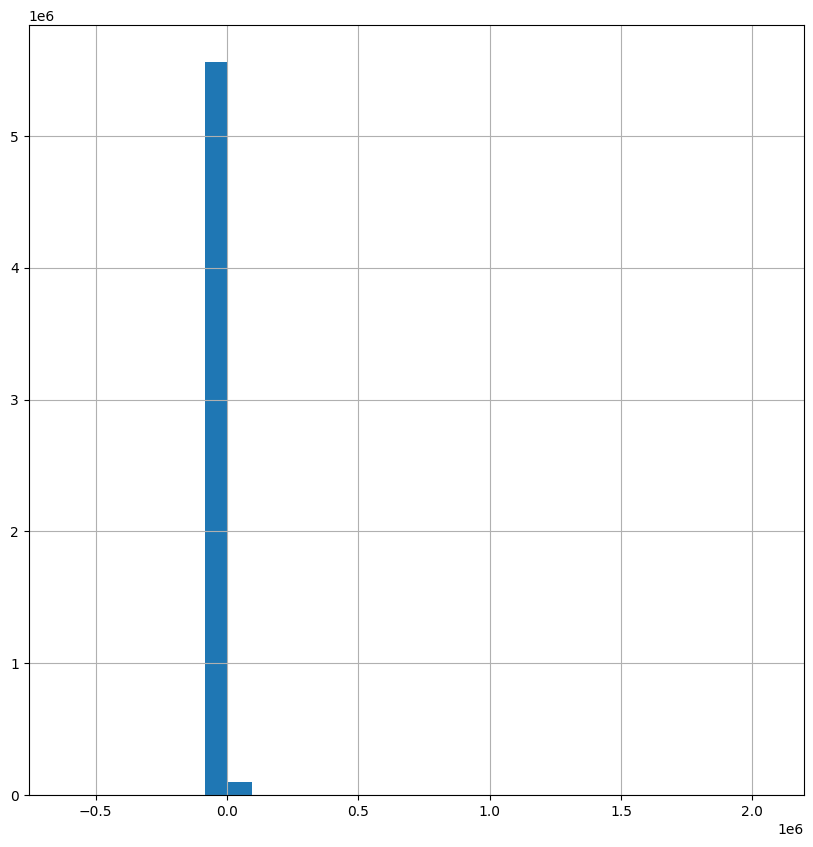

In [253]:
# Check the distribution of ride_length
df['ride_length'].hist(figsize = (10,10), bins = 30)

In [254]:
# Check for any negative values in ride length
df[df['ride_length'] < 0]

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
403326,2D97E3C98E165D80,classic_bike,2022-03-05 11:00:57,2022-03-05 10:55:01,-356,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.936688,-87.636829,41.936688,-87.636829,casual
406503,7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,-7,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.936313,-87.652522,41.936253,-87.652662,casual
1465760,0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,-12,Broadway & Waveland Ave,13325,NA,NA,41.949069,-87.648499,41.950000,-87.650000,casual
1634127,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,-7802,NA,NA,Kostner Ave & North Ave,519,41.900000,-87.740000,41.910000,-87.740000,casual
1634550,072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,-7621,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.920000,-87.650000,41.920000,-87.650000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5434378,7598EB707107648D,electric_bike,2022-11-06 01:15:50,2022-11-06 01:01:57,-833,Federal St & Polk St,SL-008,NA,NA,41.872029,-87.629522,41.930000,-87.670000,casual
5437376,75780B25C9DF4DB1,electric_bike,2022-11-06 01:59:42,2022-11-06 01:04:20,-3322,Wilton Ave & Diversey Pkwy,TA1306000014,NA,NA,41.932236,-87.652662,41.940000,-87.660000,member
5458572,4139B11634039661,classic_bike,2022-11-06 01:58:46,2022-11-06 01:11:33,-2833,Clark St & Grace St,TA1307000127,Broadway & Berwyn Ave,13109,41.950780,-87.659172,41.978353,-87.659753,member
5472729,1BA8DEBE4E13DD1D,electric_bike,2022-11-06 01:52:09,2022-11-06 01:04:23,-2866,State St & Chicago Ave,21544,NA,NA,41.896048,-87.628493,41.930000,-87.650000,casual


In [255]:
df.drop(df[df['ride_length'] < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [256]:
# Calculate and insert the day of week based on the started_at column
day_of_week = df['started_at'].dt.day_name()
df.insert(ended_at_index + 2, 'day_of_week', day_of_week)

In [257]:

# Save the data into a db called 2022-divvy-tripdata.db for future analysis
"""
sqlite_file = '2022-divvy-tripdata.db'

engine = create_engine(f'sqlite:///{sqlite_file}')

df['started_at'] = df['started_at'].astype(str)
df['ended_at'] = df['ended_at'].astype(str)

df.to_sql('2022_divvy_tripdata', con=engine, index=False, if_exists='replace')
"""

In [266]:
# Save the df to a .csv for Tableau Dashboard Viz
#df.to_csv('2022-divvy-tripdata.csv', index=False)

# Analyze the data

In [267]:
df.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,177,Thursday,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,261,Monday,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,261,Tuesday,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,896,Tuesday,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,362,Thursday,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [268]:
# Explore differnt rideable types
df['rideable_type'].unique().tolist()

['electric_bike', 'classic_bike', 'docked_bike']

In [269]:
# Explore differnt days of the week type
df['day_of_week'].unique().tolist()

['Thursday', 'Monday', 'Tuesday', 'Sunday', 'Saturday', 'Friday', 'Wednesday']

In [270]:
# Explore differnt days of the week type
len(df['start_station_name'].unique().tolist())

1674

In [271]:
# Explore differnt days of the week type
len(df['end_station_name'].unique().tolist())

1692

In [272]:
# Calculate the percentage of scenarios where the 'start_station_name' is the same as the 'end_station_name'
np.round(len(df[df['start_station_name'] == df['end_station_name']]) *100/ len(df), 2)

12.73

In [273]:
# Count number of casual riders vs member riders
df['member_casual'].value_counts()

member    3344945
casual    2316805
Name: member_casual, dtype: int64

In [274]:
# Convert the values to percentage
total = df['member_casual'].value_counts().sum()
member = np.round(df['member_casual'].value_counts()[0] * 100/ total, 2)
casual = np.round(df['member_casual'].value_counts()[1] * 100/ total, 2)

print(f'Member riders: {member}% \nCasual riders: {casual}%')

Member riders: 59.08% 
Casual riders: 40.92%


## Analyze the differences in terms of behavior between casual riders and member riders

In [275]:
# Split the df into 2 dfs representing the causal riders and member riders
df_casual = df[df['member_casual'] == 'casual']
df_member = df[df['member_casual'] == 'member']

In [276]:
df_casual.describe()

,ride_length,start_lat,start_lng,end_lat,end_lng
count,2.316805e+06,2.316805e+06,2.316805e+06,2.316805e+06,2.316805e+06
mean,1.319231e+03,4.190398e+01,-8.764782e+01,4.190431e+01,-8.764813e+01
std,3.788855e+03,4.531180e-02,3.116278e-02,4.551240e-02,3.141579e-02
min,0.000000e+00,4.164000e+01,-8.784000e+01,4.155000e+01,-8.805000e+01
25%,4.400000e+02,4.188209e+01,-8.766358e+01,4.188224e+01,-8.766375e+01
50%,7.780000e+02,4.190096e+01,-8.764288e+01,4.190231e+01,-8.764312e+01
75%,1.439000e+03,4.193000e+01,-8.762680e+01,4.193000e+01,-8.762680e+01
max,2.061244e+06,4.207000e+01,-8.752000e+01,4.219000e+01,-8.730000e+01


In [277]:
df_member.describe()

,ride_length,start_lat,start_lng,end_lat,end_lng
count,3.344945e+06,3.344945e+06,3.344945e+06,3.344945e+06,3.344945e+06
mean,7.447181e+02,4.190104e+01,-8.764785e+01,4.190121e+01,-8.764795e+01
std,1.171281e+03,4.676678e-02,2.814651e-02,4.692819e-02,2.820763e-02
min,0.000000e+00,4.164000e+01,-8.784000e+01,4.155000e+01,-8.814000e+01
25%,3.070000e+02,4.188000e+01,-8.766150e+01,4.188000e+01,-8.766150e+01
50%,5.300000e+02,4.189854e+01,-8.764450e+01,4.189859e+01,-8.764514e+01
75%,9.160000e+02,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01
max,8.999600e+04,4.207000e+01,-8.752000e+01,4.237000e+01,-8.730000e+01


Text(0.5, 1.0, 'Distribution of rideable_type among casual riders')

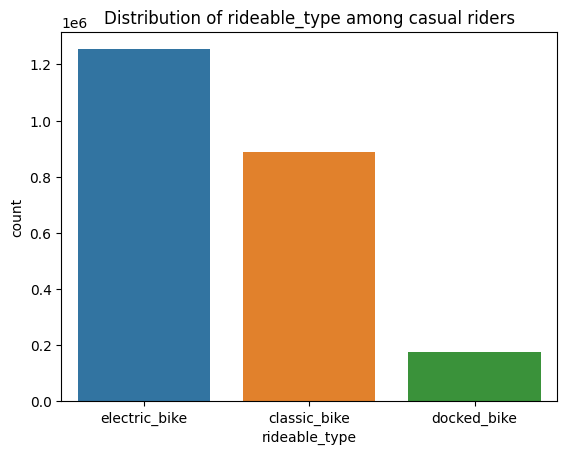

In [278]:
sns.countplot(data = df_casual, x = 'rideable_type')
plt.title('Distribution of rideable_type among casual riders')

Text(0.5, 1.0, 'Distribution of rideable_type among member riders')

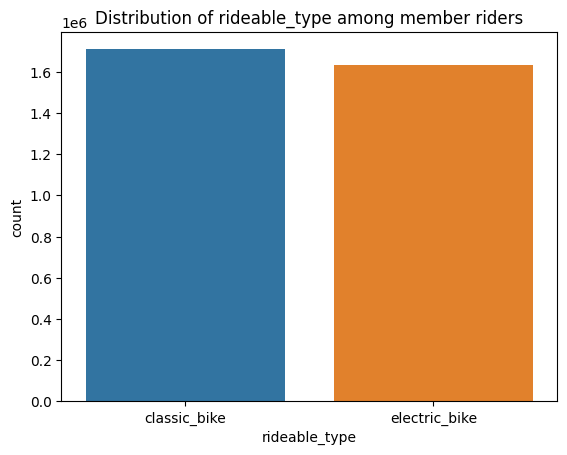

In [279]:
sns.countplot(data = df_member, x = 'rideable_type')
plt.title('Distribution of rideable_type among member riders')

In [280]:
mean_rider_lengtth_per_rideable_type_casual = df_casual.groupby(df_casual['rideable_type'])['ride_length'].agg(mean_value='mean').reset_index()
mean_rider_lengtth_per_rideable_type_member = df_member.groupby(df_member['rideable_type'])['ride_length'].agg(mean_value='mean').reset_index()

Text(0.5, 1.0, 'Average Ride Length for Casual Riders Per Rideable Type in 2022')

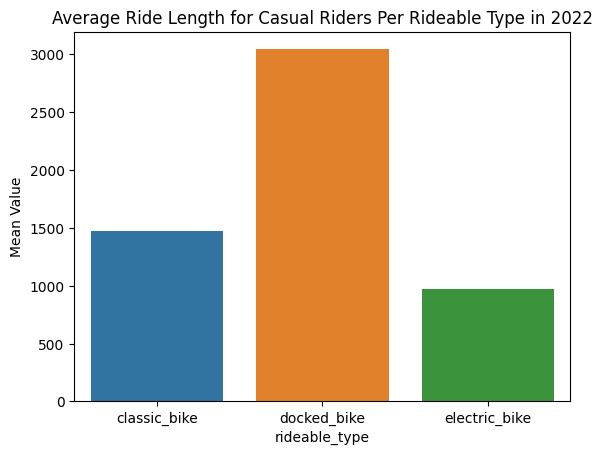

In [281]:
sns.barplot(data = mean_rider_lengtth_per_rideable_type_casual, x = 'rideable_type', y = 'mean_value')

# Add labels and title
plt.xlabel('rideable_type')
plt.ylabel('Mean Value')
plt.title('Average Ride Length for Casual Riders Per Rideable Type in 2022')

Text(0.5, 1.0, 'Average Ride Length for Member Riders Per Rideable Type in 2022')

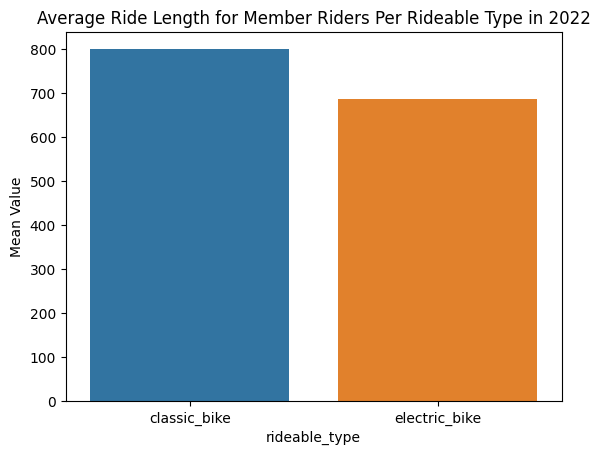

In [282]:
sns.barplot(data = mean_rider_lengtth_per_rideable_type_member, x = 'rideable_type', y = 'mean_value')

# Add labels and title
plt.xlabel('rideable_type')
plt.ylabel('Mean Value')
plt.title('Average Ride Length for Member Riders Per Rideable Type in 2022')

Text(0.5, 1.0, 'Distribution of days of the week among casual riders')

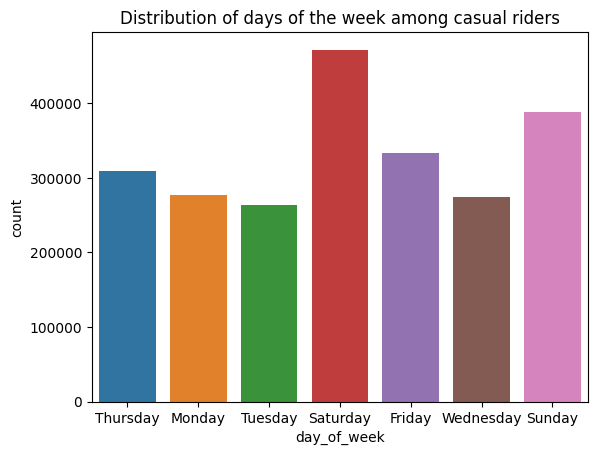

In [283]:
sns.countplot(data = df_casual, x = 'day_of_week')
plt.title('Distribution of days of the week among casual riders')

Text(0.5, 1.0, 'Distribution of days of the week among member riders')

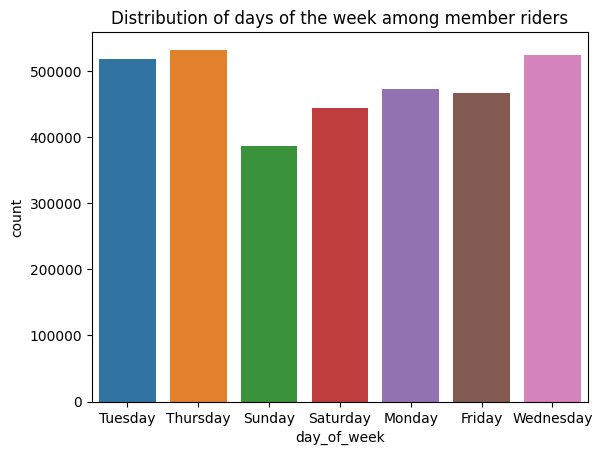

In [284]:
sns.countplot(data = df_member, x = 'day_of_week')
plt.title('Distribution of days of the week among member riders')

In [285]:
mean_rider_lengtth_per_day_of_week_casual = df_casual.groupby(df_casual['day_of_week'])['ride_length'].agg(mean_value='mean').reset_index()
mean_rider_lengtth_per_day_of_week_member = df_member.groupby(df_member['day_of_week'])['ride_length'].agg(mean_value='mean').reset_index()

Text(0.5, 1.0, 'Daily Average Ride Length for Casual Riders in 2022')

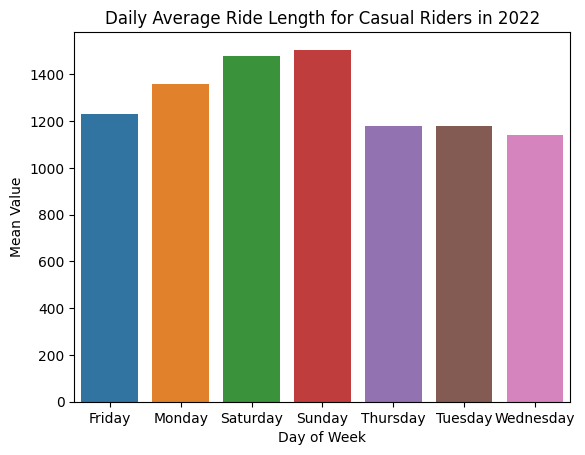

In [286]:
sns.barplot(data = mean_rider_lengtth_per_day_of_week_casual, x = 'day_of_week', y = 'mean_value')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Mean Value')
plt.title('Daily Average Ride Length for Casual Riders in 2022')

Text(0.5, 1.0, 'Daily Average Ride Length for Member Riders in 2022')

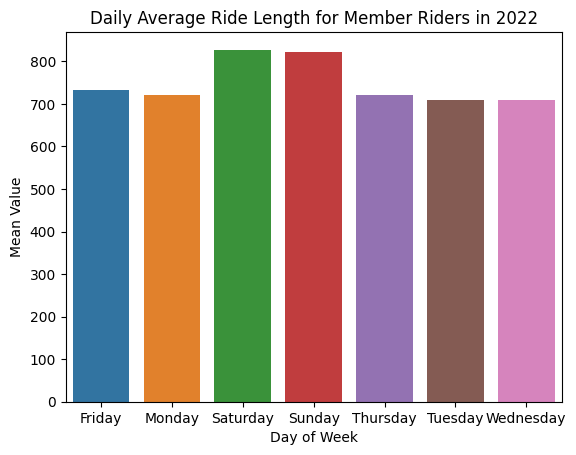

In [287]:
sns.barplot(data = mean_rider_lengtth_per_day_of_week_member, x = 'day_of_week', y = 'mean_value')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Mean Value')
plt.title('Daily Average Ride Length for Member Riders in 2022')

In [288]:
top_start_stations_casual = df_casual['start_station_name'].value_counts().iloc[1:].head(5)
top_start_stations_casual

Streeter Dr & Grand Ave               57855
DuSable Lake Shore Dr & Monroe St     31749
Millennium Park                       25405
Michigan Ave & Oak St                 25226
DuSable Lake Shore Dr & North Blvd    23585
Name: start_station_name, dtype: int64

Text(0, 0.5, 'Frequency')

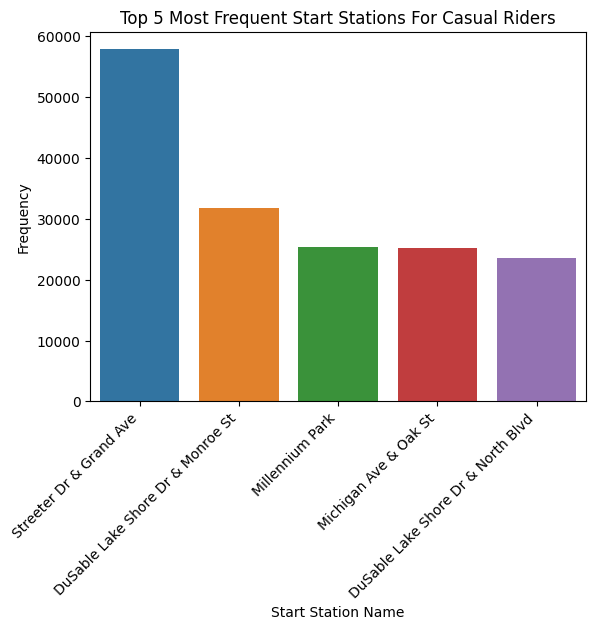

In [289]:
sns.barplot(x=top_start_stations_casual.index, y=top_start_stations_casual.values)
plt.title('Top 5 Most Frequent Start Stations For Casual Riders')
plt.xlabel('Start Station Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')

In [290]:
top_start_stations_member = df_member['start_station_name'].value_counts().iloc[1:].head(5)
top_start_stations_member

Kingsbury St & Kinzie St        24933
Clark St & Elm St               22031
Wells St & Concord Ln           21294
University Ave & 57th St        19945
Clinton St & Washington Blvd    19825
Name: start_station_name, dtype: int64

Text(0, 0.5, 'Frequency')

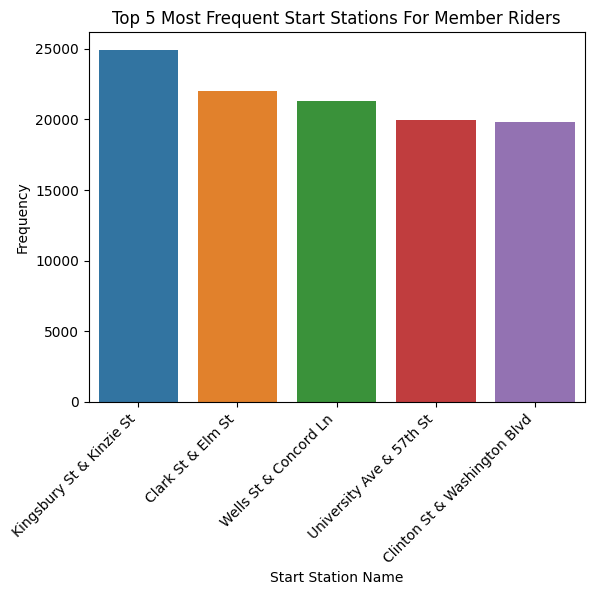

In [291]:
sns.barplot(x = top_start_stations_member.index, y = top_start_stations_member.values)
plt.title('Top 5 Most Frequent Start Stations For Member Riders')
plt.xlabel('Start Station Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')

In [292]:
top_end_stations_casual = df_casual['end_station_name'].value_counts().iloc[1:].head(5)
top_end_stations_casual

Streeter Dr & Grand Ave               59876
DuSable Lake Shore Dr & Monroe St     29603
Millennium Park                       26677
Michigan Ave & Oak St                 26450
DuSable Lake Shore Dr & North Blvd    26144
Name: end_station_name, dtype: int64

Text(0, 0.5, 'Frequency')

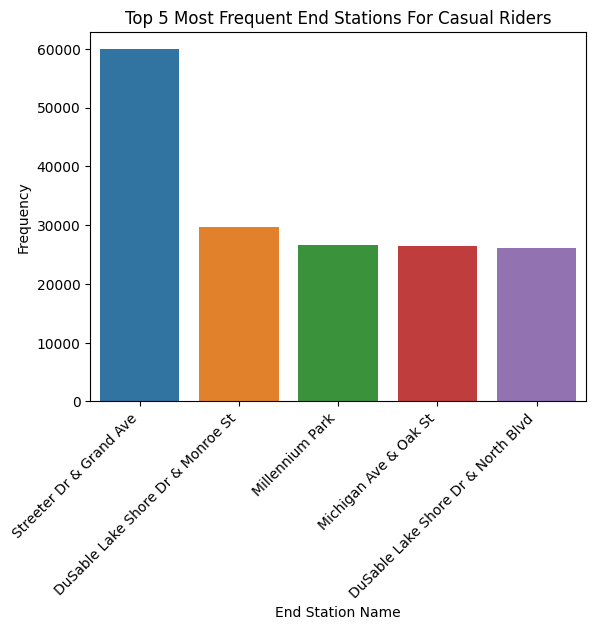

In [293]:
sns.barplot(x=top_end_stations_casual.index, y=top_end_stations_casual.values)
plt.title('Top 5 Most Frequent End Stations For Casual Riders')
plt.xlabel('End Station Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')

In [294]:
top_end_stations_member = df_member['end_station_name'].value_counts().iloc[1:].head(5)
top_end_stations_member

Kingsbury St & Kinzie St        24636
Clark St & Elm St               22367
Wells St & Concord Ln           21914
University Ave & 57th St        20534
Clinton St & Washington Blvd    20529
Name: end_station_name, dtype: int64

Text(0, 0.5, 'Frequency')

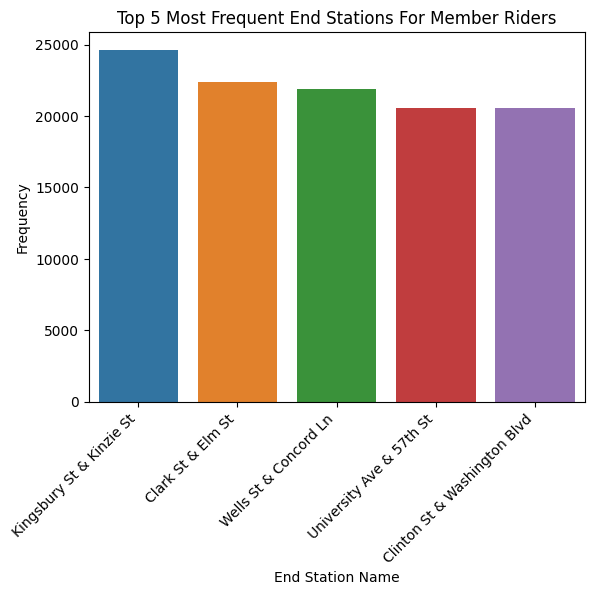

In [295]:
sns.barplot(x=top_end_stations_member.index, y=top_end_stations_member.values)
plt.title('Top 5 Most Frequent End Stations For Member Riders')
plt.xlabel('End Station Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')

In [296]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df_casual = df[df['member_casual'] == 'casual']
df_member = df[df['member_casual'] == 'member']


max_rider_lengtth_each_month_casual = df_casual.groupby(df_casual['started_at'].dt.month)['ride_length'].agg(max_value='max').reset_index()
max_rider_lengtth_each_month_member = df_member.groupby(df_member['started_at'].dt.month)['ride_length'].agg(max_value='max').reset_index()
mean_rider_lengtth_each_month_casual = df_casual.groupby(df_casual['started_at'].dt.month)['ride_length'].agg(mean_value='mean').reset_index()
mean_rider_lengtth_each_month_member = df_member.groupby(df_member['started_at'].dt.month)['ride_length'].agg(mean_value='mean').reset_index()

Text(0.5, 1.0, 'Monthly Maximum Ride Length for Casual Riders in 2022')

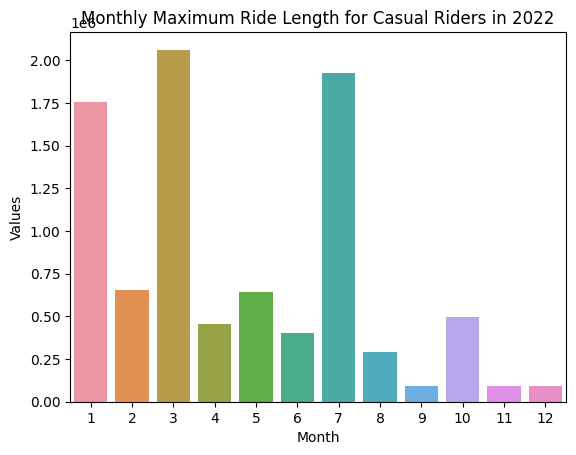

In [297]:
sns.barplot(data = max_rider_lengtth_each_month_casual, x = 'started_at', y = 'max_value')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Maximum Ride Length for Casual Riders in 2022')

Text(0.5, 1.0, 'Monthly Maximum Ride Length for Member Riders in 2022')

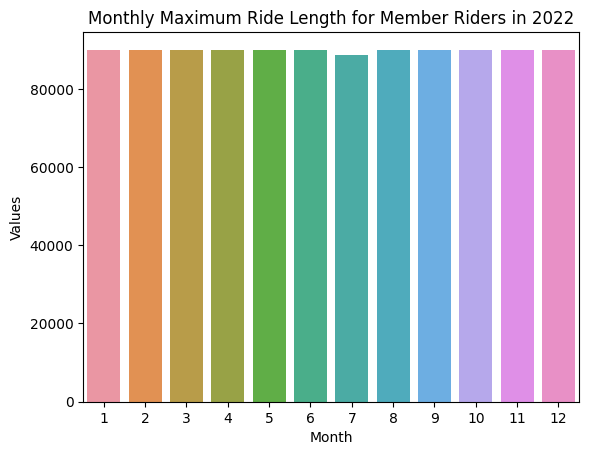

In [298]:
sns.barplot(data = max_rider_lengtth_each_month_member, x = 'started_at', y = 'max_value')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Maximum Ride Length for Member Riders in 2022')

Text(0.5, 1.0, 'Monthly Average Ride Length for Casual Riders in 2022')

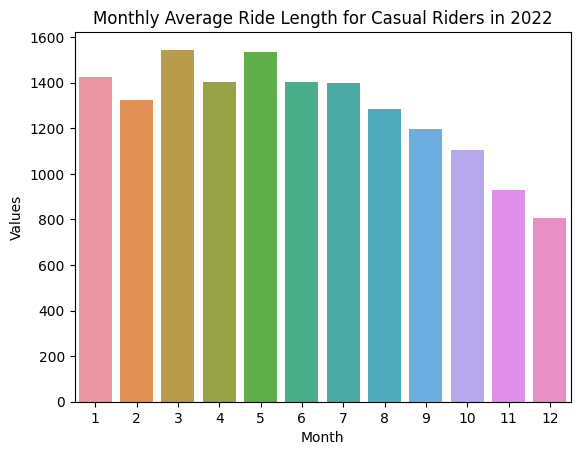

In [299]:
sns.barplot(data = mean_rider_lengtth_each_month_casual, x = 'started_at', y = 'mean_value')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Average Ride Length for Casual Riders in 2022')

Text(0.5, 1.0, 'Monthly Average Ride Length for Member Riders in 2022')

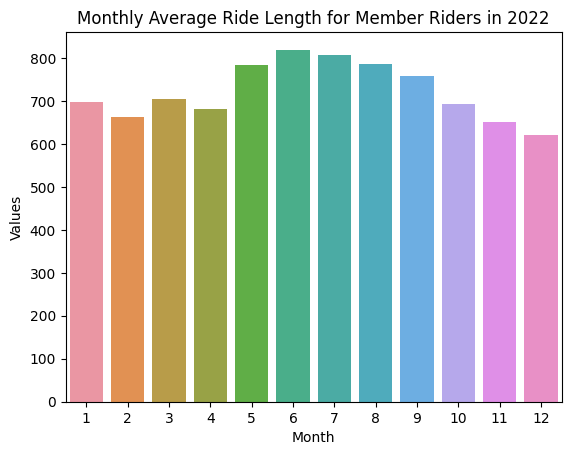

In [300]:
sns.barplot(data = mean_rider_lengtth_each_month_member, x = 'started_at', y = 'mean_value')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Average Ride Length for Member Riders in 2022')